<a href="https://colab.research.google.com/github/ApoorvaChinta/credit-card-fraud-/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/UCI_Credit_Card.csv.zip (Unzipped Files)/UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# checking for the number of columns, shape of the data
print(data.columns)
print(data.shape)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
(30000, 25)


In [ ]:
# checking for null values if any

data.isna().sum()
# no null values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
#checking the data types
data.dtypes
# the data types need not be changed

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [ ]:
#REPLACING THE VALUE -2 AND -1 TO 0 AS THE PAYMENTS WERE MADE ON TIME
data['PAY_0']=data['PAY_0'].replace(to_replace=[-1,-2],value=0)
data['PAY_2']=data['PAY_2'].replace(to_replace=[-1,-2],value=0)
data['PAY_3']=data['PAY_3'].replace(to_replace=[-1,-2],value=0)
data['PAY_4']=data['PAY_4'].replace(to_replace=[-1,-2],value=0)
data['PAY_5']=data['PAY_5'].replace(to_replace=[-1,-2],value=0)
data['PAY_6']=data['PAY_6'].replace(to_replace=[-1,-2],value=0)
data['MARRIAGE']=data['MARRIAGE'].replace(0,3)

In [ ]:
data.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JULY','PAY_4':'PAY_JUNE','PAY_5':'PAY_MAY'},inplace=True) #changing the column name

In [ ]:
data.drop('ID',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


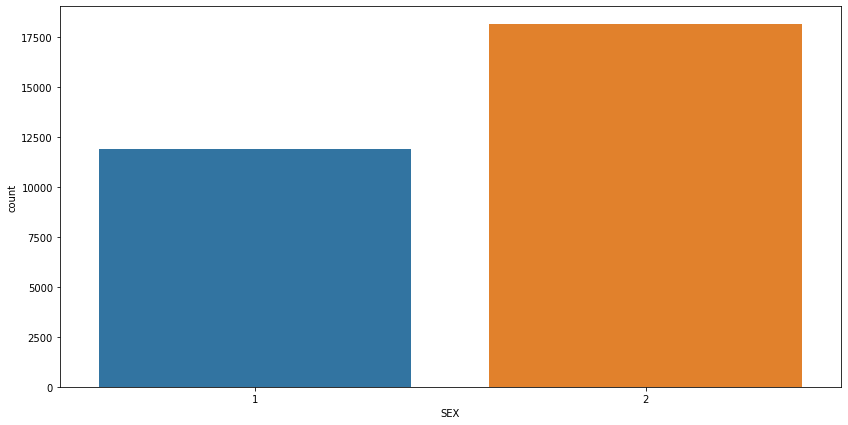

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


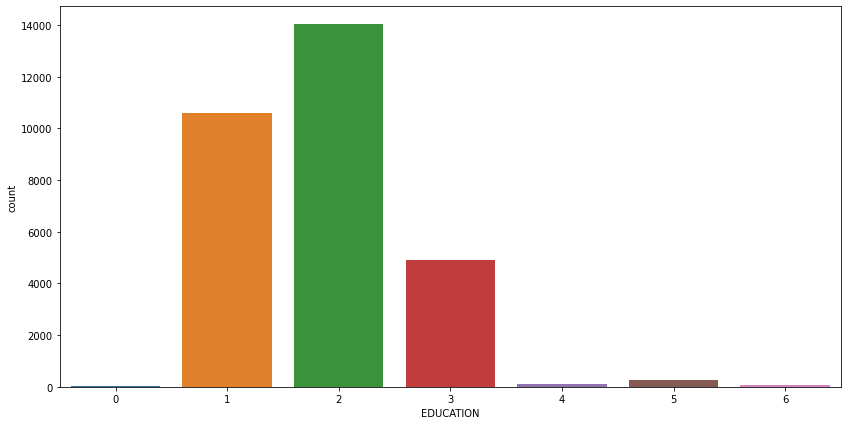

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


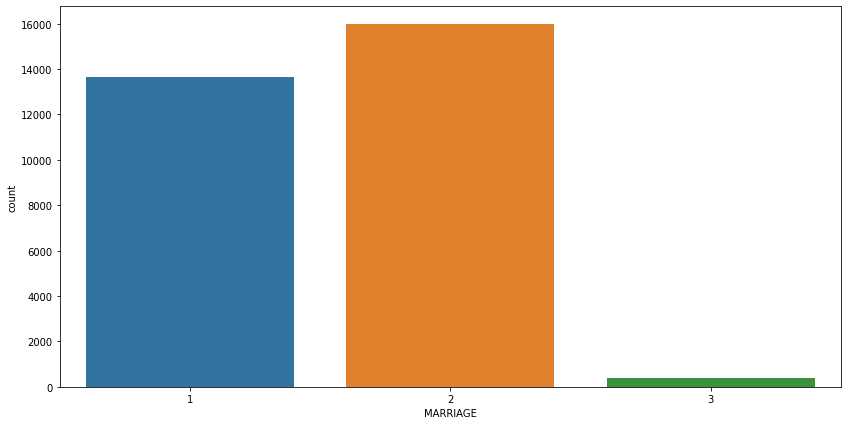

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


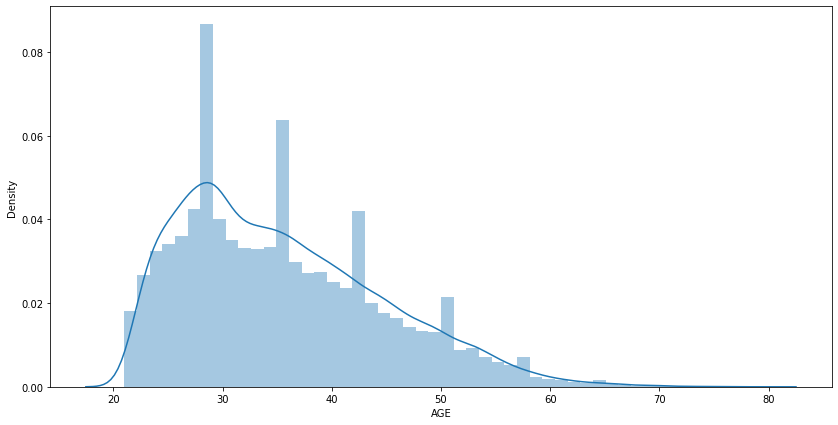

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


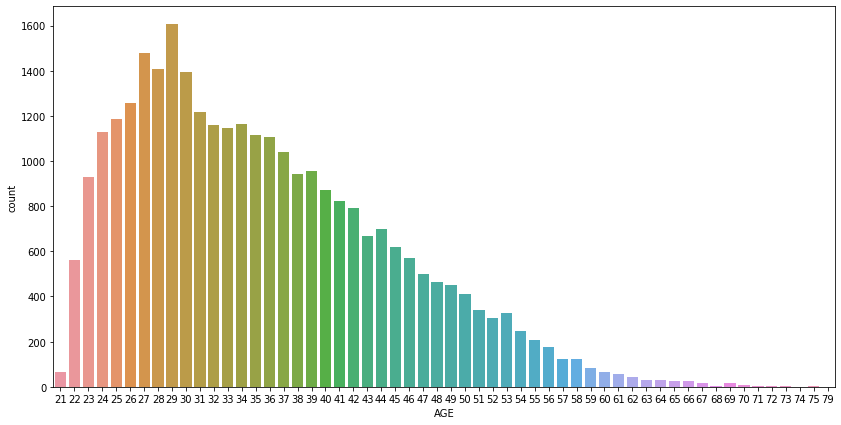

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


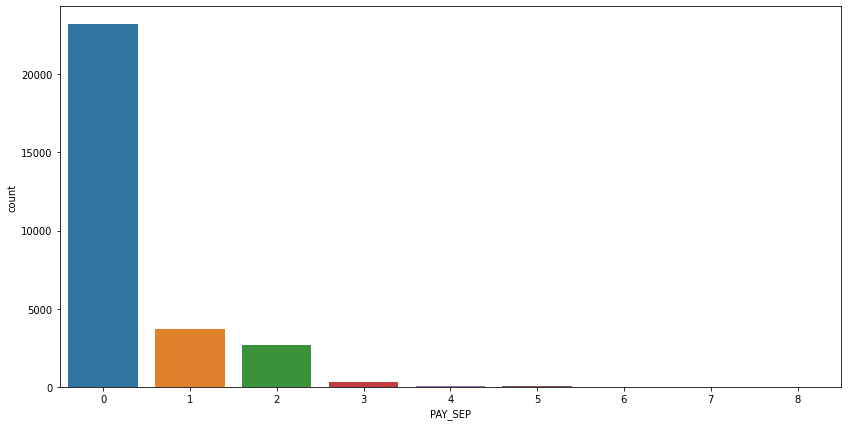

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


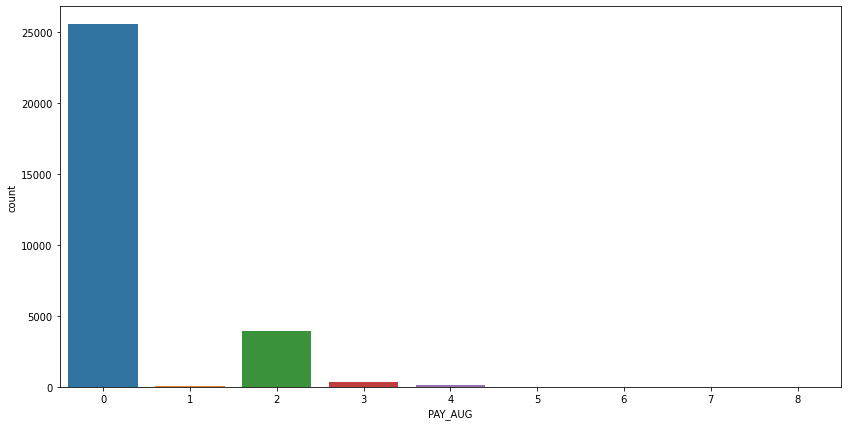

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


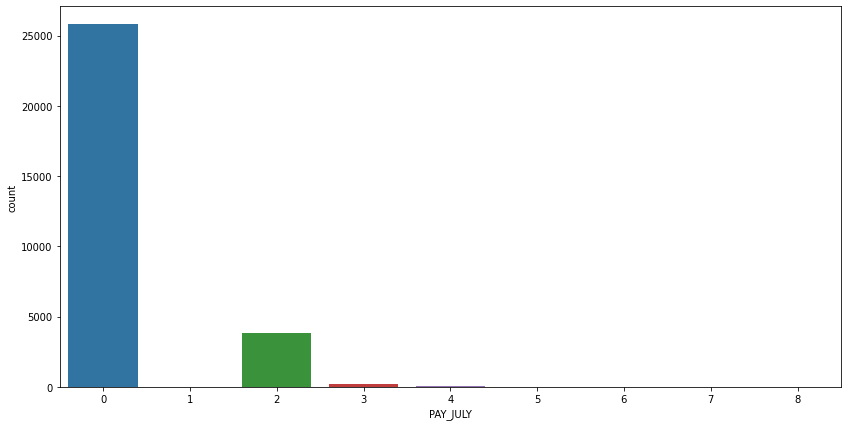

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


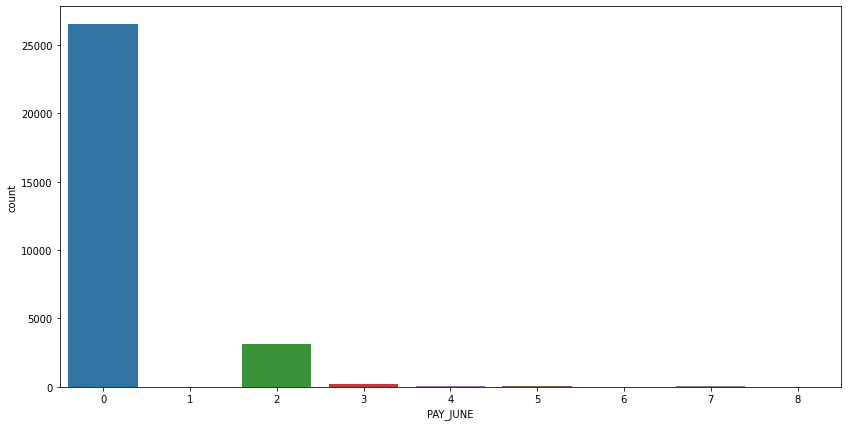

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


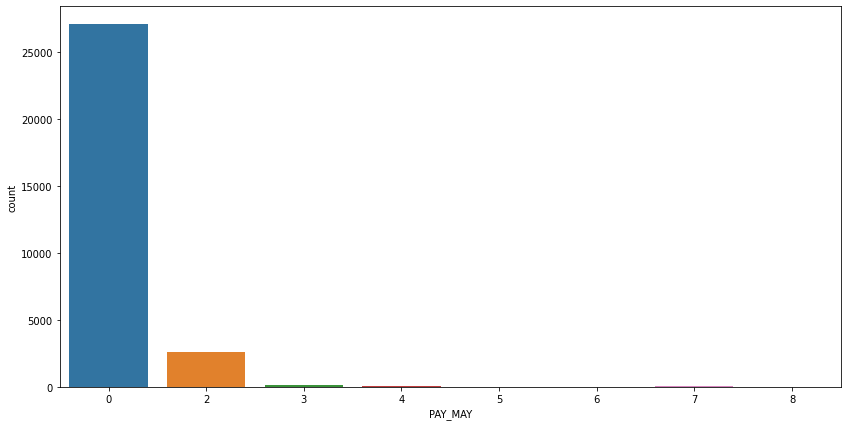

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


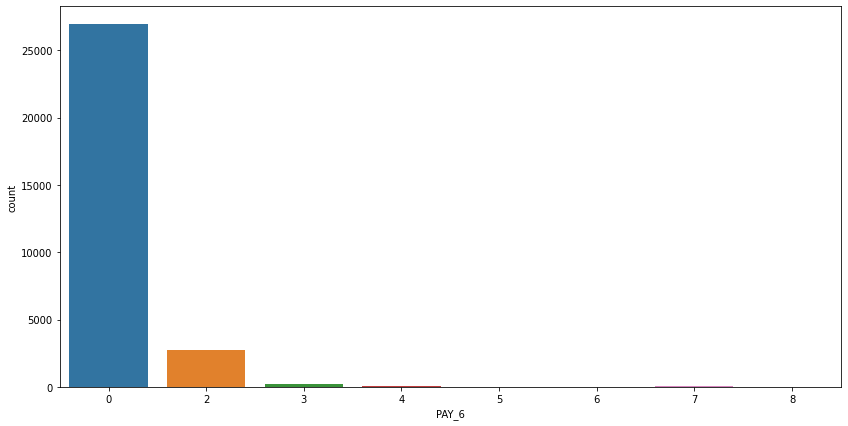

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


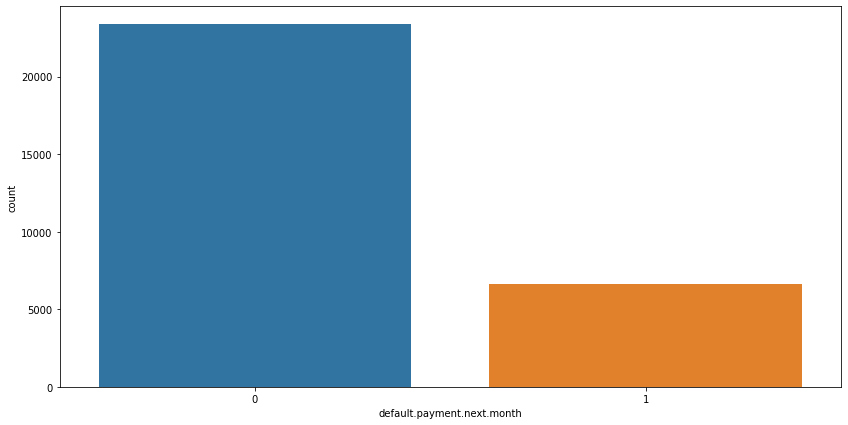

In [ ]:

for column in data.columns:
  if column=='AGE':
    plt.figure(figsize=(14,7))
    sns.distplot(data['AGE'])
    plt.show()
  if data[column].dtype == 'int64':
    plt.figure(figsize=(14,7))
    sns.countplot(data[column])
    plt.show()
  

 

Feature VS Target

In [ ]:
a=sorted(data.groupby(by='SEX')['default.payment.next.month'].mean())
x=data.SEX.unique()
df1=pd.DataFrame({'DEFAULTER':a,'GENDER':x})
px.bar(df1,y='DEFAULTER',x='GENDER',color='GENDER') #1-male 2-Female

In [ ]:
a=sorted(data.groupby(by='EDUCATION')['default.payment.next.month'].mean())
x=data.EDUCATION.unique()
df1=pd.DataFrame({'EDUCATION':a,'DEFAULTER':x})
px.bar(df1,y='DEFAULTER',x='EDUCATION',color='EDUCATION') #education has relation with target variable

In [ ]:
a=sorted(data.groupby(by='MARRIAGE')['default.payment.next.month'].mean())
x=data.MARRIAGE.unique()
df1=pd.DataFrame({'DEFAULTER':a,'MARITAL STATUS':x})
px.bar(df1,y='DEFAULTER',x='MARITAL STATUS',color='MARITAL STATUS') # marital status has relation with target variable

In [ ]:
b=sorted(data.groupby(by='AGE')['default.payment.next.month'].mean())
x=data.AGE.unique()
df1=pd.DataFrame({'DEFAULTER':b,'AGE':x})
px.bar(df1,y='DEFAULTER',x='AGE',color='AGE') #AGE has no linear relation with target

#Definig Feature and Target



In [ ]:
x=data.drop('default.payment.next.month',axis=1)
y=data['default.payment.next.month']
print('shape of x:',x.shape)
print('shape of y:',y.shape)

shape of x: (30000, 23)
shape of y: (30000,)


#Balancing the data

In [ ]:
data['default.payment.next.month'].unique()
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

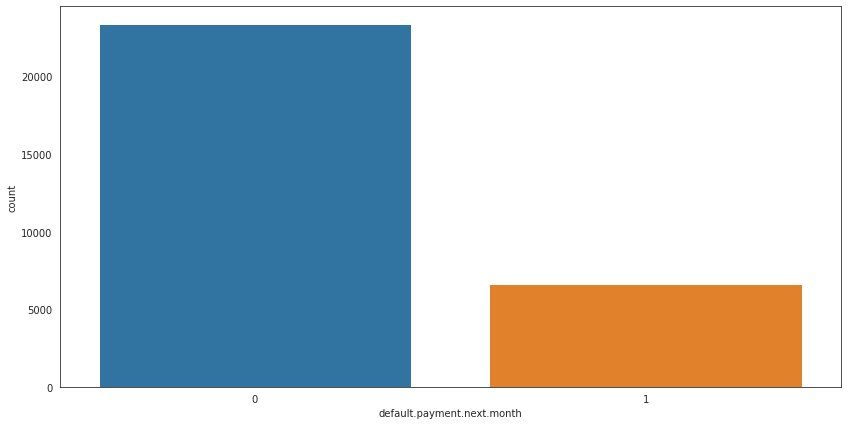

In [ ]:
plt.figure(figsize=(14,7))
sns.set_style('white')
sns.countplot(x='default.payment.next.month',data=data)

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

NM=NearMiss()
x_nm,y_nm=NM.fit_resample(x,y)
print(x.shape)
print(y.shape)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_nm)))


#Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_nm,y_nm,random_state=0,test_size=0.2)

#Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(x_nm,y_nm)
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_nm.columns
mutual_info.sort_values(ascending=False)

LIMIT_BAL    0.092021
PAY_AUG      0.083124
PAY_AMT1     0.078711
PAY_AMT3     0.078180
PAY_AMT6     0.076646
PAY_SEP      0.075231
PAY_AMT2     0.074007
PAY_AMT5     0.071228
PAY_AMT4     0.070527
PAY_JULY     0.067181
PAY_JUNE     0.054298
PAY_MAY      0.049363
PAY_6        0.047838
BILL_AMT3    0.023892
MARRIAGE     0.023136
SEX          0.022574
BILL_AMT5    0.022395
BILL_AMT1    0.021459
BILL_AMT4    0.020786
BILL_AMT2    0.017741
BILL_AMT6    0.017111
EDUCATION    0.011765
AGE          0.000000
dtype: float64

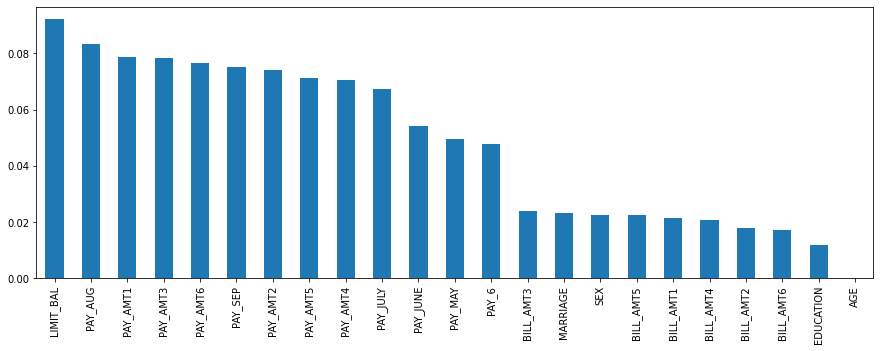

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

array([0.09389889, 0.02120642, 0.00920976, 0.03048926, 0.00621574,
       0.07603372, 0.08083746, 0.06348865, 0.06129033, 0.05153849,
       0.04545742, 0.02177376, 0.01801501, 0.02426118, 0.01821913,
       0.02008959, 0.01529163, 0.08209696, 0.07166039, 0.07808873,
       0.07857742, 0.06801762, 0.0736404 ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

LIMIT_BAL    0.093899
PAY_AMT1     0.082097
PAY_AUG      0.080837
PAY_AMT4     0.078577
PAY_AMT3     0.078089
PAY_SEP      0.076034
PAY_AMT6     0.073640
PAY_AMT2     0.071660
PAY_AMT5     0.068018
PAY_JULY     0.063489
PAY_JUNE     0.061290
PAY_MAY      0.051538
PAY_6        0.045457
MARRIAGE     0.030489
BILL_AMT3    0.024261
BILL_AMT1    0.021774
SEX          0.021206
BILL_AMT5    0.020090
BILL_AMT4    0.018219
BILL_AMT2    0.018015
BILL_AMT6    0.015292
EDUCATION    0.009210
AGE          0.006216
dtype: float64

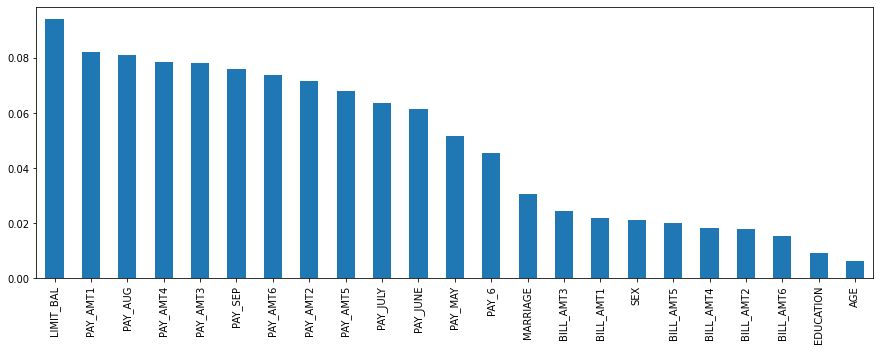

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
x_train_new=x_train.drop(['SEX','MARRIAGE','EDUCATION'],axis=1)
x_test_new=x_test.drop(['SEX','MARRIAGE','EDUCATION'],axis=1)

#BUILDING MODEL

#Logistic Regression

In [ ]:
#building the model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train_new,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test_new)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

acc=confusion_matrix(y_test,predictions)
print(acc)
print(accuracy_score(y_test,predictions))

[[2679 1878]
 [1516 3025]]
0.6269509782369752


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_new,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred=classifier.predict(x_test_new)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3989  568]
 [ 770 3771]]
0.8529347109254781
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4557
           1       0.87      0.83      0.85      4541

    accuracy                           0.85      9098
   macro avg       0.85      0.85      0.85      9098
weighted avg       0.85      0.85      0.85      9098



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


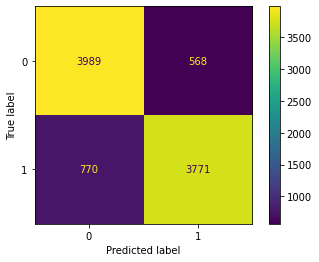

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, x_test_new, y_test)  

#SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_new, y_train) 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred=clf.predict(x_test_new)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[2458 2099]
 [1356 3185]]
0.620246207957793
              precision    recall  f1-score   support

           0       0.64      0.54      0.59      4557
           1       0.60      0.70      0.65      4541

    accuracy                           0.62      9098
   macro avg       0.62      0.62      0.62      9098
weighted avg       0.62      0.62      0.62      9098



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier(max_depth=9,random_state=100)
#fitting the model
decisiontree.fit(x_train_new,y_train)
#predicting the target value
y_pred=decisiontree.predict(x_test_new)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[3526 1031]
 [1370 3171]]
0.7360958452407123
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      4557
           1       0.75      0.70      0.73      4541

    accuracy                           0.74      9098
   macro avg       0.74      0.74      0.74      9098
weighted avg       0.74      0.74      0.74      9098



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest=RandomForestClassifier(max_depth=10,n_estimators=250,random_state=134)
#fitting the model
randomforest.fit(x_train_new,y_train)
#predicting the target value
y_pred=randomforest.predict(x_test_new)
y_pred

#finding the score of the model
rf_score=randomforest.score(x_test_new,y_test)
print('Random Forest Model score is :',rf_score*100,'%')


Random Forest Model score is : 76.92899538360079 %


#ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=150,random_state=10)
#fitting the model
ada.fit(x_train_new,y_train)
#predicting the target value
y_pred=ada.predict(x_test_new)
y_pred

#finding the score of the model
ada_score=ada.score(x_test_new,y_test)
print('Ada Boost Model score is :',ada_score*100,'%')


Ada Boost Model score is : 74.9285557265333 %


In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, x_test_new, y_test)  

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#fitting the model
GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(x_train,y_train)
#predicting the target value
y_pred=GradientBoosting.predict(x_test)
y_pred

#finding the score of the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)
print('Gradient Boosting Model score is :',GradientBoosting_score*100,'%')

Gradient Boosting Model score is : 78.3688722796219 %


#KN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_new,y_train)
   yhat=neigh.predict(x_test_new)
   mean_acc[n-1] =accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
mean_acc

array([0.83446911, 0.81996043, 0.78072104, 0.7750055 , 0.75137393,
       0.74324027, 0.72994065, 0.73136953, 0.72213673])

#BEST FIT MODEL

In [1]:
print("Logistic Regression Score: 62.69%")
print("Random Forest Score: 85.29%")
print("SVM Score: 62.02%")
print("Decision Tree Score: 73.61%")
print("ADA Boost Score: 74.92%")
print("Gradient Boosting Model Score: 78.37%")
print("KN Classifier Score: 83.44%")

Logistic Regression Score: 62.69%
Random Forest Score: 85.29%
SVM Score: 62.02%
Decision Tree Score: 73.61%
ADA Boost Score: 74.92%
Gradient Boosting Model Score: 78.37%
KN Classifier Score: 83.44%
